![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/ErwinDS4U/miad-nlp/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### *Análisis descriptivo*

In [17]:
# Obtenemos las dimensiones de la data
bikes.shape

(10886, 12)

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64


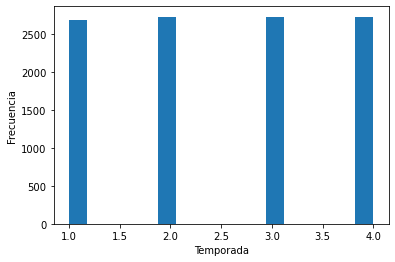

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


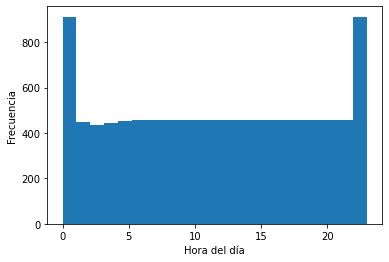

In [20]:
# descripción estadística de la variable "season"
print(bikes["season"].describe())

# histograma de la variable "season"
plt.hist(bikes["season"], bins='auto')
plt.xlabel("Temporada")
plt.ylabel("Frecuencia")
plt.show()

# descripción estadística de la variable "hour"
print(bikes["hour"].describe())

# histograma de la variable "hour"
plt.hist(bikes["hour"], bins='auto')
plt.xlabel("Hora del día")
plt.ylabel("Frecuencia")
plt.show()

Para la variable "season", podemos observar que el conjunto de datos consta de cuatro estaciones diferentes, con una frecuencia similar de muestras para cada una de ellas. El valor mínimo y máximo de la variable son 1 y 4 respectivamente. El histograma muestra que hay una pequeña diferencia entre la información de la primera estación y las demás.

En cuanto a la variable "hour", podemos ver que los datos se registraron durante las 24 horas del día. El valor mínimo y máximo de la variable son 0 y 23 respectivamente. La descripción estadística muestra que la información entre 11 pm y 1 am con respecto a las demás horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

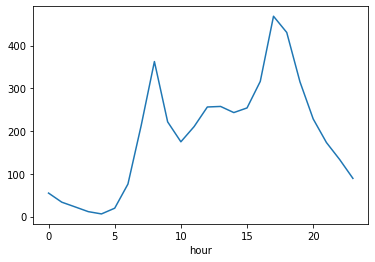

In [13]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

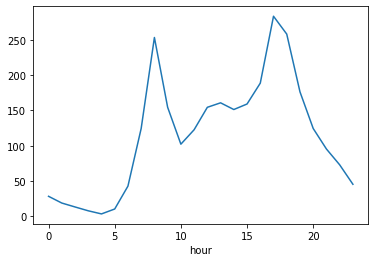

In [51]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_s1 = bikes[bikes['season'] == 1]
bikes_s1.groupby('hour').total.mean().plot()

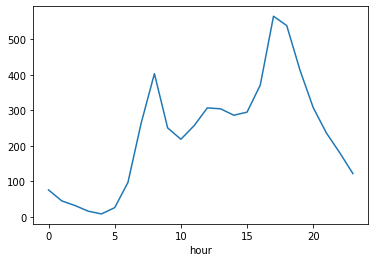

In [48]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_s2 = bikes[bikes['season'] == 3]
bikes_s2.groupby('hour').total.mean().plot()

La gráfica muestra que la mayoría de las muestras se recopilaron durante las horas diurnas (entre las 8 a.m. y las 7 p.m.), con una frecuencia máxima en la hora 17.se muestra un pico en la hora 17 y una disminución en las horas nocturnas (entre las 12 a.m. y las 4 a.m.)

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [52]:
# Celda 3
# Creamos el modelo de regresión lineal
modelo = LinearRegression()

# Definimos las variables predictoras y la variable respuesta
X = bikes[['season', 'hour']]
y = bikes['total']

# Ajustamos el modelo a los datos
modelo.fit(X, y)

# Imprimimos los coeficientes
print('Coeficientes:', modelo.coef_)
print('Intercepto:', modelo.intercept_)

Coeficientes: [26.95130851 10.52129824]
Intercepto: 2.5848513346807636


Esto significa que la ecuación del modelo de regresión lineal es:
total = 26.95 * season + 10.52 * hour + 2.58

*Podemos interpretar estos coeficientes de la siguiente manera:*

- Si aumentamos la variable season en una unidad, el valor esperado de total aumenta en 26.95 unidades, manteniendo todas las demás variables constantes.
- Si aumentamos la variable hour en una unidad, el valor esperado de total aumenta en 10.52 unidades, manteniendo todas las demás variables constantes.
- El intercepto de 2.58 indica el valor esperado de total cuando todas las variables predictoras son iguales a cero.

*Las limitaciones de la regresión lineal en este caso son varias:*

- La relación entre total y hour podría no ser lineal, sino curvilínea o no existir.
- La variable season es categórica y estamos tratando de modelar una relación lineal entre una variable categórica y una variable numérica. Esto podría llevar a una interpretación errónea de los coeficientes.
- Podría haber otras variables relevantes que no hemos incluido en el modelo y que afectan la variable respuesta.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [54]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct=10
max_features = None
min_gain=0.001

# Impresión variable a usar (Total)
j = 1
print(X.columns[j])

# División de la variable Total en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'Total' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

y.mean(), y_l.mean(), y_r.mean()

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

# Ejecución de función tree_predict
tree_predict(X, tree)

hour


array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [55]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 6)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

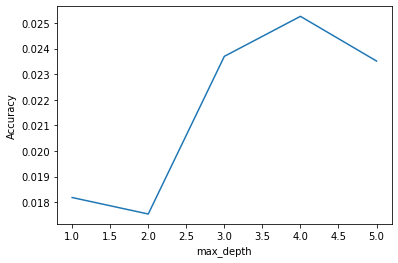

In [56]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [57]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

In [60]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [63]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':('season', 'hour'), 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
0,season,0.235199
1,hour,0.764801


In [64]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.020117
std       0.007012
min       0.008264
25%       0.015161
50%       0.020211
75%       0.025488
max       0.028466
dtype: float64

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [65]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/ErwinDS4U/miad-nlp/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [66]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [67]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [104]:
# Importar librerías necesarias
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Definir variables predictoras y de respuesta
X = df[["n_tokens_title", "num_imgs"]] # variables predictoras
y = df["Popular"] # variable de respuesta

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar modelo de árbol de decisión con una profundidad máxima de 5
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Evaluar desempeño del modelo de árbol de decisión
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree.round())
f1_tree = f1_score(y_test, y_pred_tree.round(), average='weighted')
print("Accuracy del modelo de árbol de decisión:", acc_tree)
print("F1-score del modelo de árbol de decisión:", f1_tree)

# Ajustar modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluar desempeño del modelo de regresión logística
y_pred_logistic = logistic_model.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic.round())
f1_logistic = f1_score(y_test, y_pred_logistic.round(), average='weighted')
print("Accuracy del modelo de regresión logística:", acc_logistic)
print("F1-score del modelo de regresión logística:", f1_logistic)


Accuracy del modelo de árbol de decisión: 0.585
F1-score del modelo de árbol de decisión: 0.585
Accuracy del modelo de regresión logística: 0.5608333333333333
F1-score del modelo de regresión logística: 0.5368295763155919


Text(0, 0.5, 'Accuracy')

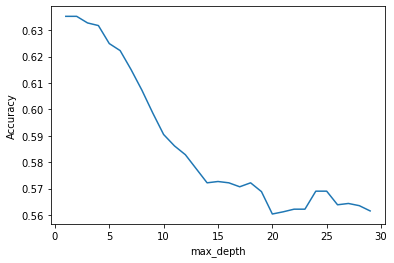

In [83]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [84]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6353333333333333, 2)

In [93]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=10, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [97]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=14)).describe()

count    14.000000
mean      0.595832
std       0.020417
min       0.557110
25%       0.587033
50%       0.595794
75%       0.611888
max       0.627040
dtype: float64

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [113]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=300, n_jobs=-1, oob_score=True) 

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5283363802559414, 0.57)

In [114]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

tree1 = DecisionTreeClassifier(max_depth=4)
tree2 = DecisionTreeClassifier(min_samples_leaf=5)
logreg = LogisticRegression()

tree1_bagging = BaggingClassifier(tree1, n_estimators=100)
tree2_bagging = BaggingClassifier(tree2, n_estimators=100)
logreg_bagging = BaggingClassifier(logreg, n_estimators=100)

ensemble = VotingClassifier(estimators=[
    ('tree1_bagging', tree1_bagging), 
    ('tree2_bagging', tree2_bagging), 
    ('logreg_bagging', logreg_bagging)], 
    voting='hard')

tree1_bagging.fit(X_train, y_train)
tree2_bagging.fit(X_train, y_train)
logreg_bagging.fit(X_train, y_train)
ensemble.fit(X_train, y_train)

# Evaluación de modelos base
tree1_bagging_pred = tree1_bagging.predict(X_test)
tree2_bagging_pred = tree2_bagging.predict(X_test)
logreg_bagging_pred = logreg_bagging.predict(X_test)

print("Accuracy y F1-score para los modelos base:")
print("Decision tree 1 bagging:")
print("Accuracy:", accuracy_score(y_test, tree1_bagging_pred))
print("F1-score:", f1_score(y_test, tree1_bagging_pred))
print("Decision tree 2 bagging:")
print("Accuracy:", accuracy_score(y_test, tree2_bagging_pred))
print("F1-score:", f1_score(y_test, tree2_bagging_pred))
print("Logistic Regression bagging:")
print("Accuracy:", accuracy_score(y_test, logreg_bagging_pred))
print("F1-score:", f1_score(y_test, logreg_bagging_pred))

# Evaluación del ensamble de modelos
ensemble_pred = ensemble.predict(X_test)
print("\nAccuracy y F1-score para el ensamble de modelos:")
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))


Accuracy y F1-score para los modelos base:
Decision tree 1 bagging:
Accuracy: 0.5808333333333333
F1-score: 0.5689802913453299
Decision tree 2 bagging:
Accuracy: 0.5675
F1-score: 0.5475152571926765
Logistic Regression bagging:
Accuracy: 0.56
F1-score: 0.42733188720173537

Accuracy y F1-score para el ensamble de modelos:
Accuracy: 0.5791666666666667
F1-score: 0.5604873803307223


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Entrenar modelos de árboles con max_depth
tree_depth_preds = []
for i in range(100):
    tree = DecisionTreeRegressor(max_depth=5)
    indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    tree.fit(X_train.iloc[indices], y_train.iloc[indices])
    tree_depth_preds.append(tree.predict(X_test))

# Entrenar modelos de árboles con min_samples_leaf
tree_leaf_preds = []
for i in range(100):
    tree = DecisionTreeRegressor(min_samples_leaf=10)
    indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    tree.fit(X_train.iloc[indices], y_train.iloc[indices])
    tree_leaf_preds.append(tree.predict(X_test))

# Entrenar modelos de regresión logística
logistic_preds = []
for i in range(100):
    logistic = LogisticRegression()
    indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    logistic.fit(X_train.iloc[indices], y_train.iloc[indices])
    logistic_preds.append(logistic.predict(X_test))

# Concatenar todas las predicciones en una matriz
preds = np.vstack((tree_depth_preds, tree_leaf_preds, logistic_preds)).T

# Evaluar modelos por separado
tree_depth_acc = accuracy_score(y_test, tree_depth_preds)
tree_depth_f1 = f1_score(y_test, tree_depth_preds)
print('Árboles de decisión con max_depth\nAccuracy: {}, F1-Score: {}'.format(tree_depth_acc, tree_depth_f1))

tree_leaf_acc = accuracy_score(y_test, tree_leaf_preds)
tree_leaf_f1 = f1_score(y_test, tree_leaf_preds)
print('Árboles de decisión con min_samples_leaf\nAccuracy: {}, F1-Score: {}'.format(tree_leaf_acc, tree_leaf_f1))

logistic_acc = accuracy_score(y_test, logistic_preds)
logistic_f1 = f1_score(y_test, logistic_preds)
print('Regresión logística\nAccuracy: {}, F1-Score: {}'.format(logistic_acc, logistic_f1))

# Calcular predicciones ponderadas
weights = [0.4, 0.4, 0.2] # peso mayor a los árboles ya que son más complejos
weighted_preds = np.average(preds, axis=1, weights=weights)
weighted_preds = np.round(weighted_preds).astype(int)

# Evaluar ensamble ponderado
weighted_acc = accuracy_score(y_test, weighted_preds)
weighted_f1 = f1_score(y_test, weighted_preds)
print('Ensamble ponderado\nAccuracy: {}, F1-Score: {}'.format(weighted_acc, weighted_f1))


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [121]:
# Celda 9
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)    

In [122]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.490856592877767, 0.5591666666666667)